<a href="https://colab.research.google.com/github/ShubhMody/Tensorflow-Developer-Certification-Prep/blob/main/02_Neural_Network_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Neural Network Classification with TensorFlow

A few types of Classification Problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating Data to Viw and Fit

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
#Make 1000 examples
n_samples = 1000

#Create Circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is hard to understand right now so lets visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


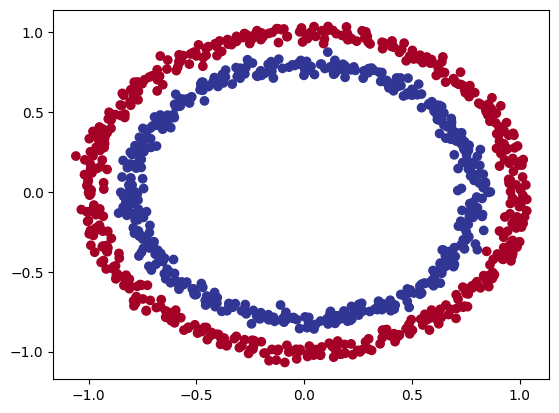

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu);

## Input and Output Shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

## Steps in Modelling

Steps in modelling with TensorFlow
1. Create or Import a model
2. Compile the model
3. Fit the model
4. Evaluate the Model
5. Tweak
6. Evaluate.....

In [ ]:
import tensorflow as tf


In [ ]:
#set the seed
tf.random.set_seed(42)

#1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3. Fit the model
model_1.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.5175 - accuracy: 0.4930
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7336 - accuracy: 0.4996
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.4961
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4986
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5008


In [ ]:
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934650540351868, 0.5]

## Lets try crteating a model with extra layer

In [ ]:
tf.random.set_seed(42)

# Creating a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics =["accuracy"])

#Fit the model
model_2.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
#Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Improving on our model

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7959 - accuracy: 0.4530


[0.7959091663360596, 0.453000009059906]

## Creating a function to visulase our model's predictions.

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the decision boundaries of the plot and create a meshgrid

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


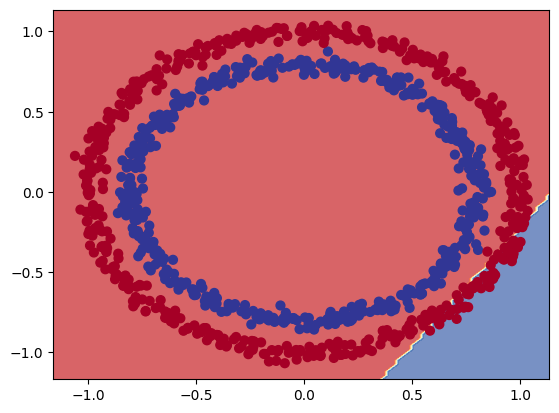

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [ ]:
# Lets see if our model can be used for a regrerssion problem

#Create regression Data
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)

#Lets split the data
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

#Changing our model's compilation to suit our data
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100, verbose = 0)


2/2 [==============================] - 0s 6ms/step


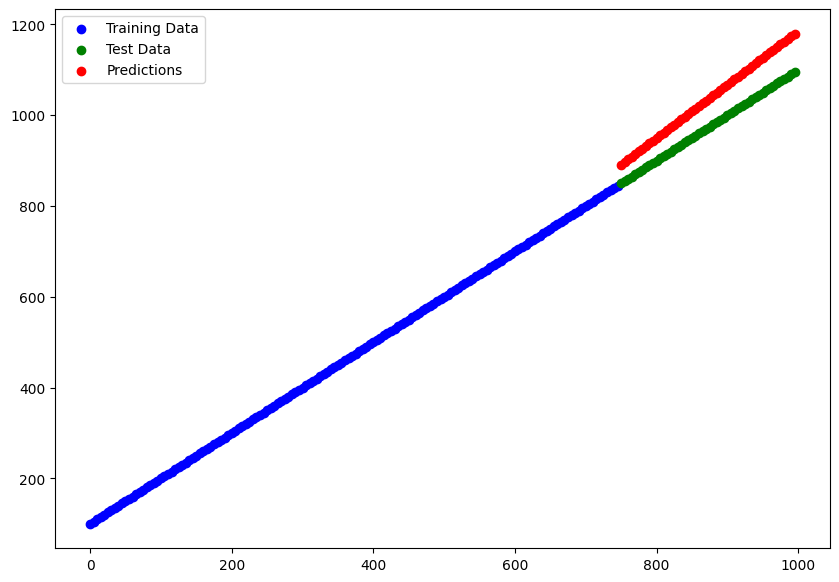

In [ ]:
#lets create predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

#lets plot our predicitons
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c='g', label = "Test Data")
plt.scatter(X_reg_test, y_reg_pred, c='r', label = "Predictions")
plt.legend();

## The Missing peice: Non-Linearity

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

#Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

#Fit the model
history = model_4.fit(X, y, epochs = 100, verbose = 0)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


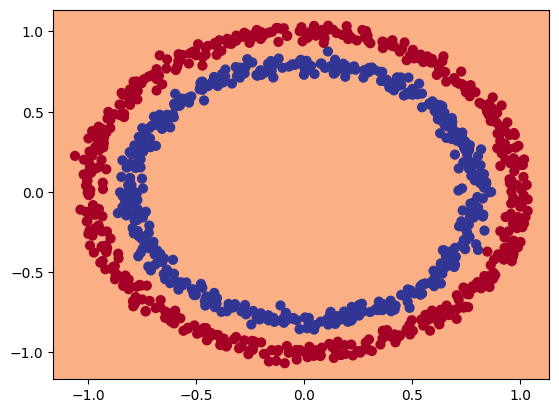

In [ ]:
plot_decision_boundary(model_4, X, y)

### Creating our first model with non-linear activation function

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#Create the model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

#Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

#Fit the model
history = model_5.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 4.3825 - accuracy: 0.4720


[4.382450103759766, 0.47200000286102295]

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#Create the model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

#Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])

#Fit the model
history = model_6.fit(X, y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 3s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


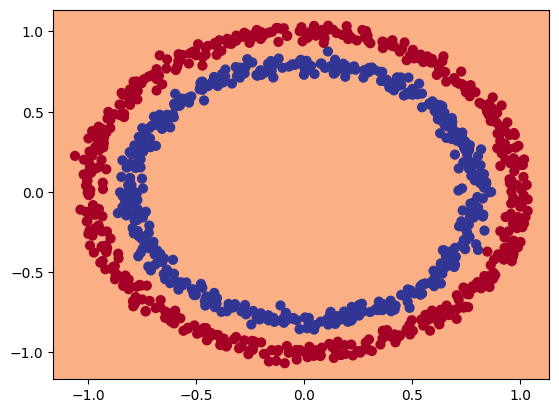

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

#Fit the model
history = model_7.fit(X, y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 3s 7ms/step - loss: 0.6984 - accuracy: 0.5030
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.4930
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.4960
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.4960
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5200
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5130
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5140
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5170
Epoch 11/

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.9870


[0.10027723014354706, 0.9869999885559082]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


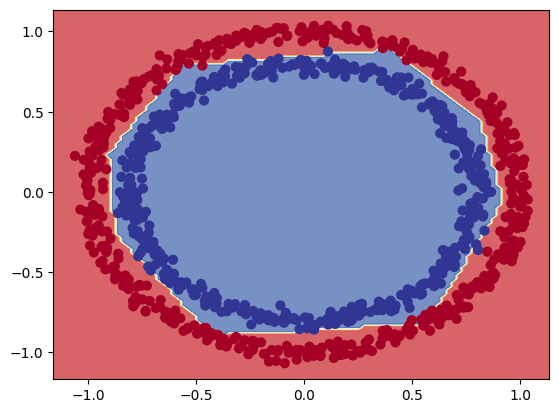

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
#Creating a Toy tensor
A = tf.cast(tf.range(-10, 10), dtype = tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

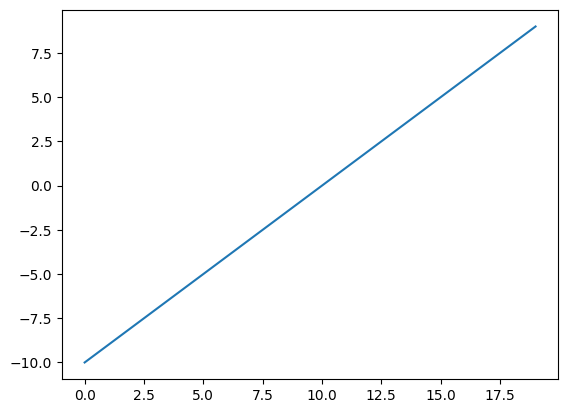

In [ ]:
plt.plot(A);

In [ ]:
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

## Using the sigmoid funtion on our toy tensor A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

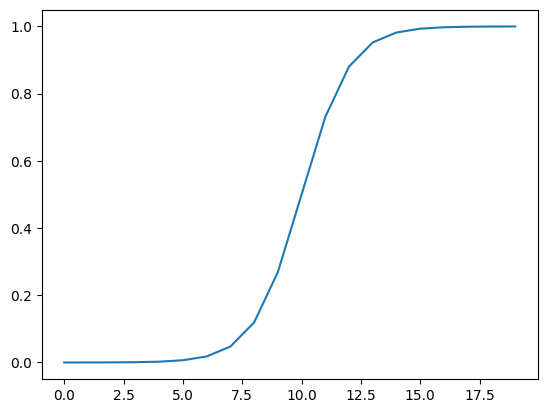

In [ ]:
#plotting the sigmoid on A
plt.plot(sigmoid(A));

In [ ]:
#lets recreate the relu function
def relu(X):
  return tf.maximum(X, 0)

#try it on our toy tensor A
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

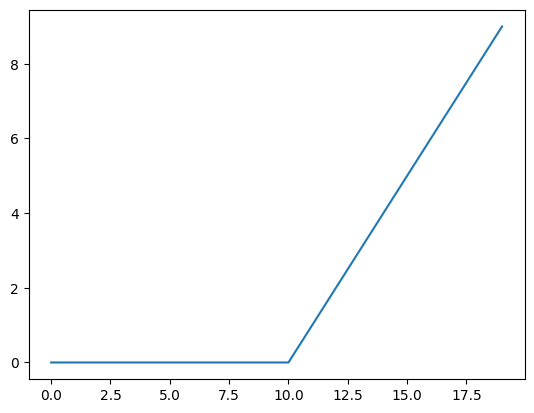

In [ ]:
plt.plot(relu(A));

## Evaluating and improving our classification

In [ ]:
#Lets split the data
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#Lets recreate our model to train on the training data and testing on the test data

#Set the random seed
tf.random.set_seed(42)

#Creating the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile the model
model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

#fit the model on training data
history = model_8.fit(X_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 5s 8ms/step - loss: 0.6982 - accuracy: 0.4850
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6923 - accuracy: 0.4750
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5013
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.5525
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.5813
Epoch 6/50
25/25 [==============================] - 0s 13ms/step - loss: 0.6380 - accuracy: 0.6737
Epoch 7/50
25/25 [==============================] - 0s 10ms/step - loss: 0.6018 - accuracy: 0.8375
Epoch 8/50
25/25 [==============================] - 0s 8ms/step - loss: 0.5651 - accuracy: 0.7900
Epoch 9/50
25/25 [==============================] - 0s 9ms/step - loss: 0.5117 - accuracy: 0.8888
Epoch 10/50
25/25 [==============================] - 0s 9ms/step - loss: 0.4573 - accuracy: 0.9200
Epoch 11/50
25/25

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 1s 6ms/step - loss: 0.0184 - accuracy: 1.0000


[0.01843162626028061, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


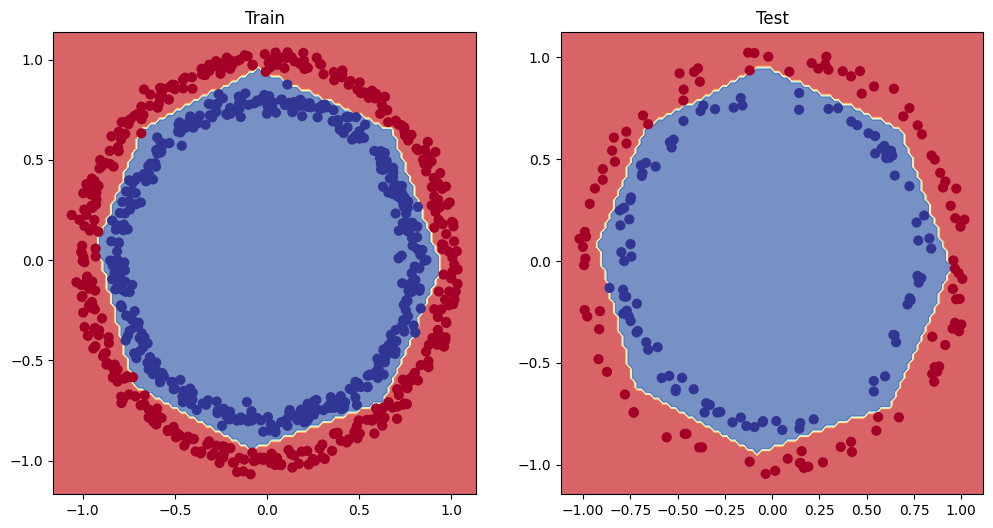

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Lets plot the Loss (or training) Curves

In [ ]:
#Convert the history object into dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.698152,0.48500
1,0.692300,0.47500
2,0.687597,0.50125
3,0.679066,0.55250
4,0.664632,0.58125
5,0.638049,0.67375
6,0.601797,0.83750
7,0.565113,0.79000
8,0.511719,0.88875
9,0.457299,0.92000


Text(0.5, 1.0, 'Model_8 loss curves')

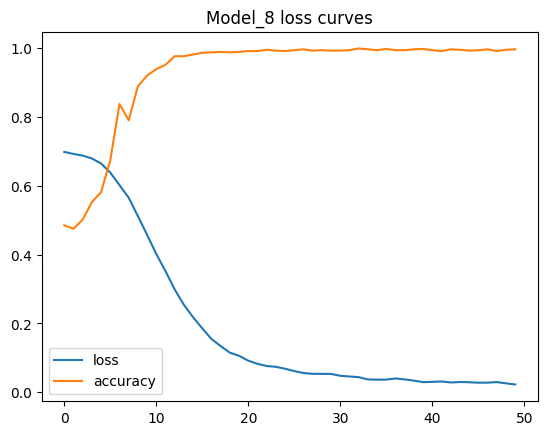

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile the model
model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the model with the lr scheduler
history = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5088 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5088 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5150 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5125 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5138 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5138 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

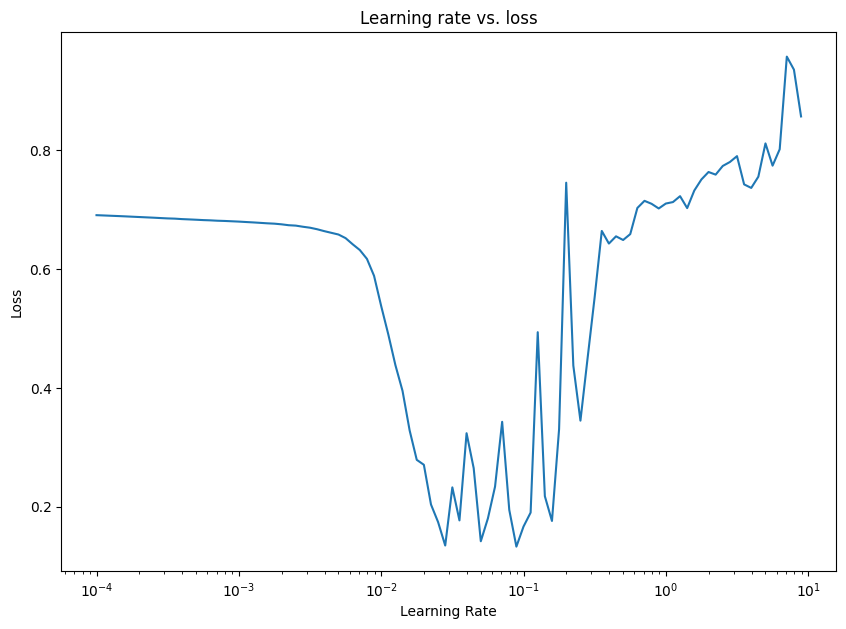

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
#set randome seed
tf.random.set_seed(42)

#Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile the model with ideal learning rate
model_10.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                 metrics = ["accuracy"])

#Fit the model with 5 less epochs than previous model
history_10 = model_10.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 2s 2ms/step - loss: 0.6850 - accuracy: 0.5813
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.5825
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6000
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6400
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.6500
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7050
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7550
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8075
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8813
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2653 - accuracy: 0.9800
Epoch 11/25
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9950


[0.035404693335294724, 0.9950000047683716]

In [ ]:
#evaluate model_8 on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 1.0000


[0.01843162626028061, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


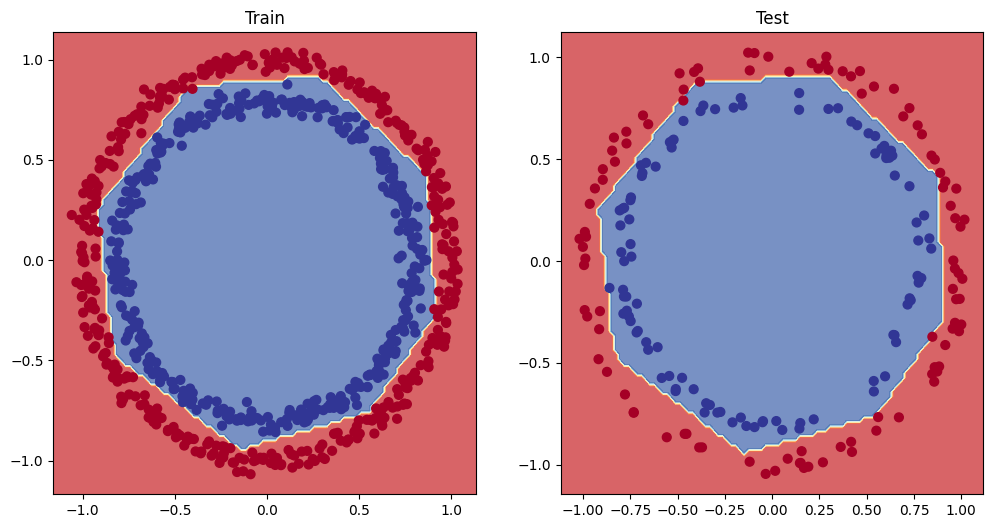

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [ ]:
#to check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9950
Model loss on test set: 0.035404693335294724
Model accuracy on test set: 99.50%


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

#make predictions on the x_test
y_preds = model_10.predict(X_test)


7/7 [==============================] - 0s 2ms/step


In [ ]:
#Create a confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

### converting prediction probabilities to binary format

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

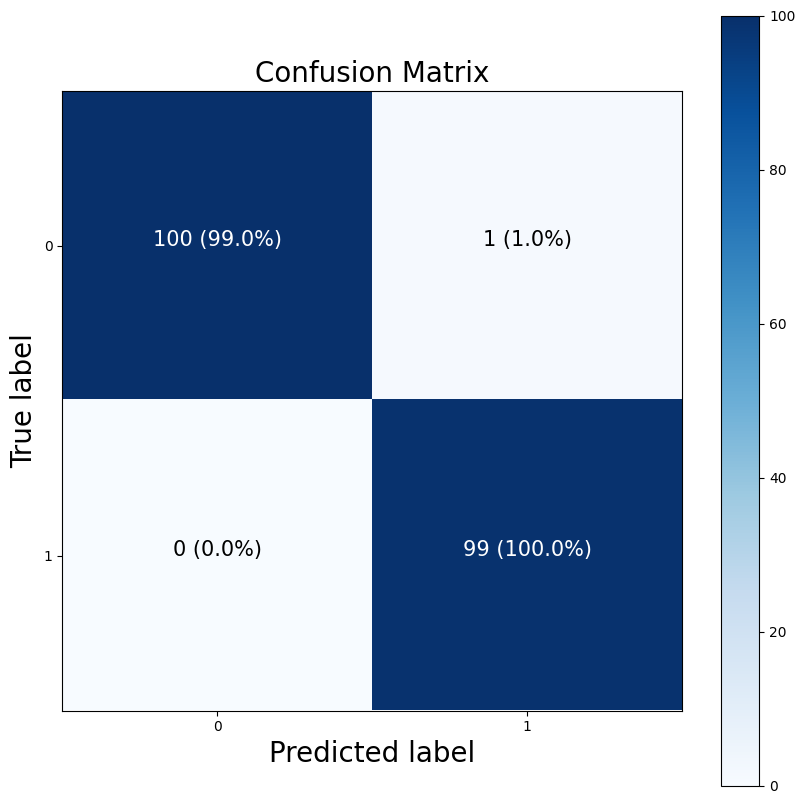

In [ ]:
# to prettify our confusion matrix
import itertools

figsize = (10, 10)

#create a confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] #normalize our confusion matrix
n_classes = cm.shape[0]

#lets prettify it
fig, ax = plt.subplots(figsize = figsize)
#matrix plot
cax = ax.matshow(cm , cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a Larger example (MultiClass Classification)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(f"Trainging sample: \n{train_data[0]}\n ")
print(f"Trainging label: \n{train_labels[0]}\n ")

Trainging sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

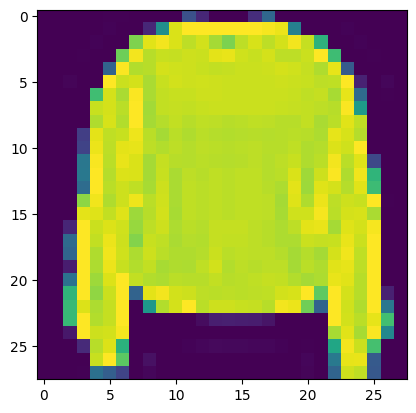

In [ ]:
#plot a single label
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
#check out samples label
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

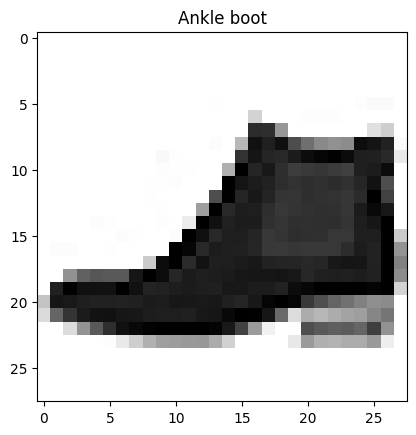

In [ ]:
#plot an example image and its label
index_of_choice = 24000
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


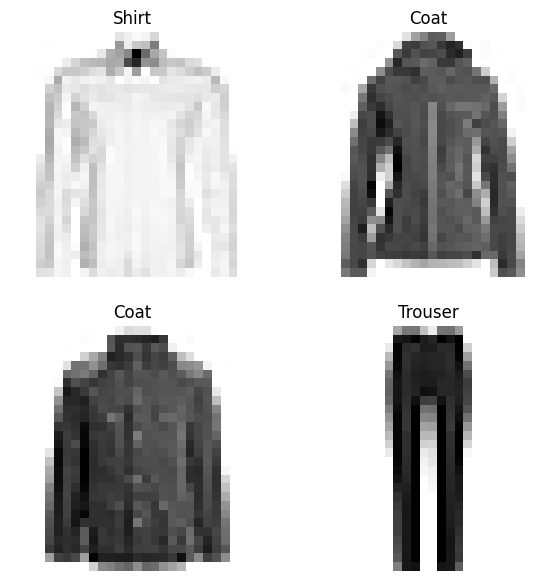

In [ ]:
#Plot multiple random images of the fashion MNIST data

import random
plt.figure(figsize = (7, 7))

for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The input shape will have to deal with 28x28 tensors (the height and width of our images).

* The output shape will have to be 10 because we need our model to predict for 10 different classes.
* We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [ ]:
#set a random seed
tf.random.set_seed(42)

#build a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0797 - accuracy: 0.2084 - val_loss: 1.7201 - val_accuracy: 0.2795
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 1.5113 - accuracy: 0.3663 - val_loss: 1.3059 - val_accuracy: 0.4386
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2809 - accuracy: 0.4464 - val_loss: 1.2659 - val_accuracy: 0.4560
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2541 - accuracy: 0.4523 - val_loss: 1.2467 - val_accuracy: 0.4605
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2408 - accuracy: 0.4618 - val_loss: 1.2468 - val_accuracy: 0.4570
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1862 - accuracy: 0.4981 - val_loss: 1.1265 - val_accuracy: 0.5655
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0540 - accuracy: 0.5595 - val_loss: 1.0569 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Neural networks prefer data to be scaled( or normalized) i.e the tensors like the data to have numbers between 0 and 1.


In [ ]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#check the min and max values of training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#set random seed
tf.random.set_seed(42)

#Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.9955 - accuracy: 0.6409 - val_loss: 0.7342 - val_accuracy: 0.7476
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6661 - accuracy: 0.7691 - val_loss: 0.6638 - val_accuracy: 0.7696
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6049 - accuracy: 0.7914 - val_loss: 0.6147 - val_accuracy: 0.7909
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5789 - accuracy: 0.7993 - val_loss: 0.6100 - val_accuracy: 0.7922
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5645 - accuracy: 0.8034 - val_loss: 0.5925 - val_accuracy: 0.7939
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5532 - accuracy: 0.8083 - val_loss: 0.6017 - val_accuracy: 0.7959
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5469 - accuracy: 0.8106 - val_loss: 0.5954 - val_accurac

<Axes: title={'center': 'Normalized data'}>

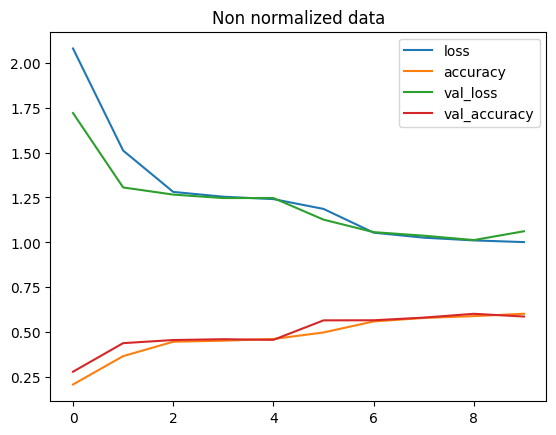

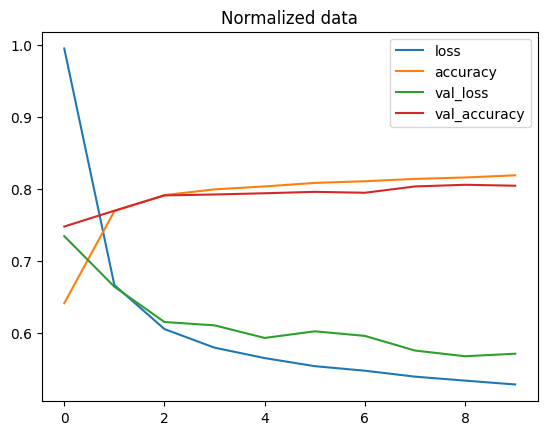

In [ ]:
import pandas as pd
#plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = "Non normalized data")
#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title = "Normalized data")

### Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),#learning_rate = )
                 metrics = ["accuracy"])

#Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20) )


find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs = 40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks = [lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4457 - accuracy: 0.4386 - val_loss: 1.1347 - val_accuracy: 0.5316 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0305 - accuracy: 0.5799 - val_loss: 0.9712 - val_accuracy: 0.6103 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9290 - accuracy: 0.6338 - val_loss: 0.9065 - val_accuracy: 0.6443 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8814 - accuracy: 0.6592 - val_loss: 0.8762 - val_accuracy: 0.6708 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8535 - accuracy: 0.6732 - val_loss: 0.8594 - val_accuracy: 0.6850 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8336 - accuracy: 0.6838 - val_loss: 0.8782 - val_accuracy: 0.6784 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5

Text(0.5, 1.0, 'Finding the ideal learning rate')

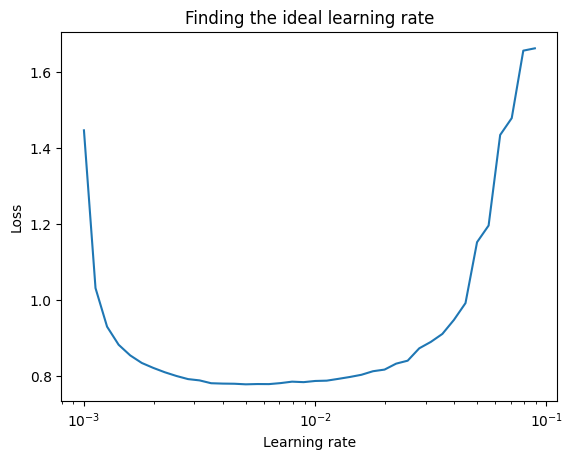

In [ ]:
#Plot the learing rate decay curve


lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])



history_14 = model_14.fit(train_data_norm,
                               train_labels,
                               epochs = 20,
                               validation_data = (test_data_norm, test_labels)
                              )

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1539 - accuracy: 0.6551 - val_loss: 0.8528 - val_accuracy: 0.7584
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7319 - accuracy: 0.7843 - val_loss: 0.7212 - val_accuracy: 0.7785
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6246 - accuracy: 0.8027 - val_loss: 0.6476 - val_accuracy: 0.7876
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5762 - accuracy: 0.8123 - val_loss: 0.6002 - val_accuracy: 0.8007
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5526 - accuracy: 0.8169 - val_loss: 0.6000 - val_accuracy: 0.8028
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5360 - accuracy: 0.8217 - val_loss: 0.5932 - val_accuracy: 0.8014
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5267 - accuracy: 0.8220 - val_loss: 0.5723 - val_accuracy:

### Create a Confusion Matrix



In [ ]:
# to prettify our confusion matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (15, 15), text_size = 10):
  #create a confusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] #normalize our confusion matrix
  n_classes = cm.shape[0]

  #lets prettify it
  fig, ax = plt.subplots(figsize = figsize)
  #matrix plot
  cax = ax.matshow(cm , cmap = plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
#make some predictions with our model
y_probs = model_14.predict(test_data_norm) #y_probs refer to the prediction probabilities

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.2756063e-03, 1.0934527e-03, 2.9710185e-04, 3.6955380e-03,
        3.3708442e-05, 1.6574560e-01, 2.8743091e-04, 4.6800144e-02,
        1.2691828e-04, 7.7864456e-01],
       [4.6632881e-04, 7.6803673e-07, 9.0434057e-01, 3.9172264e-07,
        3.4008864e-02, 1.6826027e-31, 6.1122578e-02, 0.0000000e+00,
        6.0523598e-05, 0.0000000e+00],
       [7.0781475e-08, 9.9987823e-01, 8.2496990e-05, 1.3536163e-05,
        2.5494861e-05, 2.1578515e-09, 1.6083094e-08, 0.0000000e+00,
        4.2827096e-12, 4.1318515e-20],
       [3.6650478e-09, 9.9997777e-01, 6.8782077e-07, 2.1062044e-05,
        3.2503399e-07, 3.4424485e-09, 1.2639008e-10, 3.9568479e-36,
        6.2960600e-16, 1.0523222e-15],
       [2.3397991e-01, 1.2696935e-03, 2.4471258e-01, 4.2706531e-02,
        3.7103377e-02, 2.6285814e-14, 4.3869957e-01, 1.0653548e-24,
        1.5282927e-03, 4.1302663e-16]], dtype=float32)

In [ ]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [ ]:
#Now lets convert our prediction probabilities into integers.
y_preds = y_probs.argmax(axis=1)

#view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

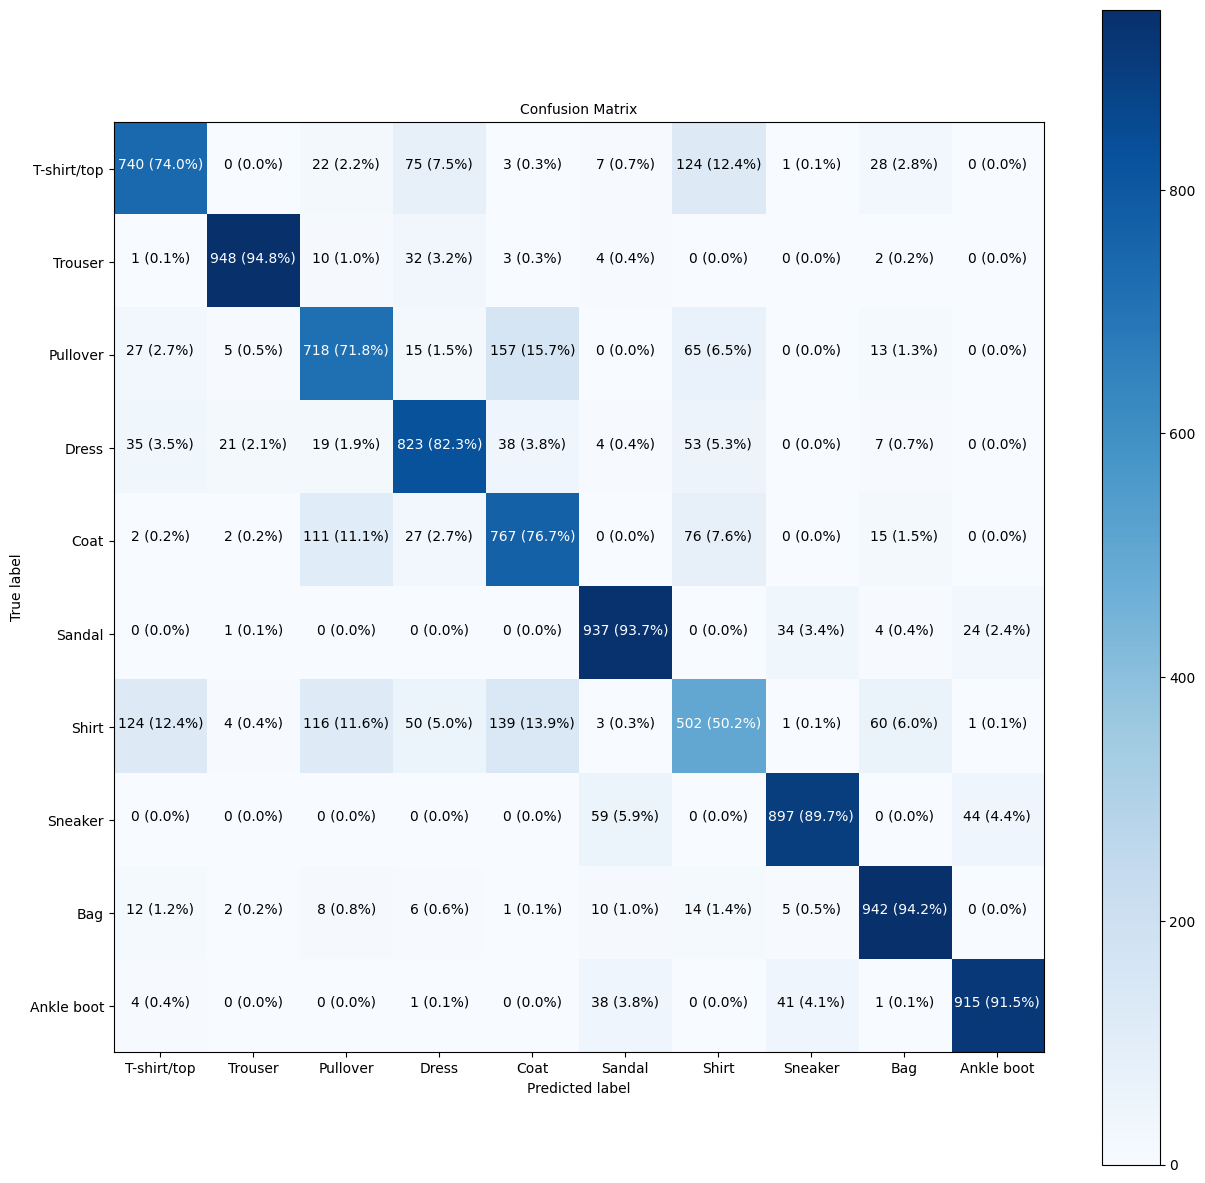

In [ ]:
#make confuxion matrix
make_confusion_matrix(test_labels, y_preds, class_names)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 23ms/step


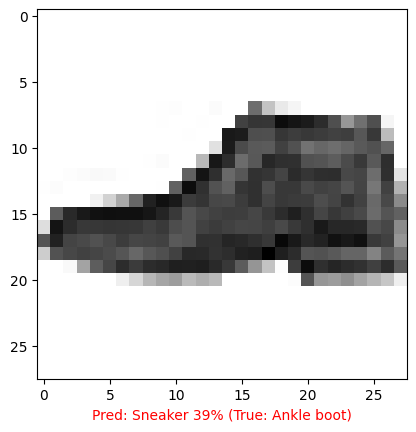

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)